# IPython and IPython Notebook

IPython is "**an enhanced Interactive Python shell**". IPython is elegant and has extensively useful features. Some of the thoughtfully crafted ones include tab completion, object introspection, a powerful history mechanism, inline editing of source code, integration with the Python debugger, the %run mechanism, macros, the ability to create multiple profiles, and system shell access.

We will try to address some of them in this Notebook (kind of meta if you think about it) and the later part of the Notebook is going to be focussed on the cool stuff that you can do with the IPython Notebook in specific.

In [1]:
from __future__ import division

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[8,6]


The four most helpful commands, as well as their brief description, is shown to you in a banner, every time you start IPython:

<table>
<tr>
<th>Command</th>
<th>Description</th>
</tr>
<tr>
<td>?</td>
<td>Introduction and overview of IPython’s features.</td>
</tr>
<tr>
<td>%quickref</td>
<td>Quick reference.</td>
</tr>
<tr>
<td>help</td>
<td>Python’s own help system.</td>
</tr>
<tr>
<td>object?	</td>
<td>Details about ‘object’, use ‘object??’ for extra details.</td>
</tr>	
</table>



## Tab Completion

A very powerful feature in IPython is tab completion.

In [2]:
xmen='Text'

You can use it to autocomplete your variables. Of course, a good Python editor should also be able to this. 

In [4]:
xmen

'Text'

You can also use this to get attributes of built-in objects 

In [5]:
import struct #This module performs conversions between Python values and C structs represented as Python strings.

In [8]:
struct.__all__

['calcsize',
 'pack',
 'pack_into',
 'unpack',
 'unpack_from',
 'iter_unpack',
 'Struct',
 'error']

Tab completion also extends to user-defined objects. In order to make your class attributes open to tab completion you would need to define a `__dir__` member method in your class definition. 

In [9]:
class Shout(object):
    def __init__(self, text, number):
        self.text = text
        self.number=number
        
    def __dir__(self):
        return ['text','number']


In [10]:
s=Shout('Hi',2)

In [11]:
s.text

'Hi'

Another useful trick to use help on an object is to use the **?** . It internally invokes `help()`, but opens an adjunct frame to display the contents. Typing object_name? will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [12]:
s?

## Magic command system

IPython has a set of predefined **magic functions** that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

In [13]:
#Line magic
%cd

/Users/rstein


In [14]:
%lsmagic #Lists all magics available

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [3]:
%pprint?

**%timeit**

In [16]:
#Line magic
%timeit range(100)

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 402 ns per loop


In [17]:
%%timeit x = range(100)
    min(x)
    max(x)
#Cell Magic

100000 loops, best of 3: 6.64 µs per loop


In [20]:
%%timeit a = np.random.rand(100, 100)
np.linalg.eigvals(a)

The slowest run took 23.21 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 6.61 ms per loop


The **%%capture** magic can be used to capture the stdout/err of any block of python code, either to discard it (if it's noise to you) or to store it in a variable for later use:

In [21]:
%%capture capt
from __future__ import print_function
import sys
print('Hello stdout')
print('and stderr', file=sys.stderr)

In [22]:
capt.stdout, capt.stderr

('Hello stdout\n', 'and stderr\n')

In [23]:
capt.show()

Hello stdout


and stderr


The **%%writefile** magic writes the cell contents as a named file:

In [10]:
%%writefile foo.py
print('Hello world')

Overwriting foo.py


Now you can use the **%run** command to run your aforewritten script.

In [25]:
%run foo.py

Hello world


**%%script** cell magic, which lets you run a cell in a subprocess of any interpreter on your system, such as: bash, ruby, perl, zsh, R, etc.


In [5]:
%%script python
import sys
print('hello from Python %s' % sys.version)

hello from Python 3.4.3 |Anaconda 2.3.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [28]:
%%script bash
echo "hello from $BASH"

hello from /bin/bash


In [29]:
%%bash
echo "hello from $BASH"

hello from /bin/bash


In [30]:
!echo "hello from $BASH"

hello from /bin/sh


---
**Exercise**

Using the magic commands,

- write a python script to find the average of an array of [1,2,...100] 
- save it into a Python script 
- execute the saved script.

In [15]:
%%writefile average.py
import numpy as np
print(np.mean(np.arange(101)))

Overwriting average.py


In [16]:
%run average.py

50.0


---
**%who** and **%whos** magic functions list objects, functions, etc. that have been added in the current namespace, as well as modules that have been imported. **%who** lists names of such objects, while **%whos** additionally lists type and data information 

In [17]:
%who

division	 mpl	 np	 plt	 sp	 xmen	 


In [32]:
%whos

Variable         Type          Data/Info
----------------------------------------
Shout            type          <class '__main__.Shout'>
capt             CapturedIO    Hello stdout\n
division         _Feature      _Feature((2, 2, 0, 'alpha<...> 0, 0, 'alpha', 0), 8192)
mpl              module        <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np               module        <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt              module        <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
print_function   _Feature      _Feature((2, 6, 0, 'alpha<...>0, 0, 'alpha', 0), 65536)
s                Shout         <__main__.Shout object at 0x105912940>
sp               module        <module 'scipy' from '/Us<...>kages/scipy/__init__.py'>
struct           module        <module 'struct' from '/U<...>lib/python3.4/struct.py'>
sys              module        <module 'sys' (built-in)>
xmen             str           Text


**%hist** presents a list of the last several input command lines.

In [18]:
%hist

from __future__ import division

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[8,6]
xmen='Text'
%pprint?
%%writefile foo.py
print('Hello world')
%%script python
import sys
print('hello from Python %s' % sys.version)
np.arange(101)
np.arange(1, 101)
%%writefile foo.py
np.mean(np.arange(101))
%%writefile foo.py
print('Hello world')
%%writefile foo.py
print('Hello world')
%%writefile average.py
np.mean(np.arange(101))
%run average.py
%%writefile average.py
import numpy as np
np.mean(np.arange(101))
%run average.py
%%writefile average.py
import numpy as np
print(np.mean(np.arange(101)))
%run average.py
%who
%hist


**%edit** This will open an editor (whatever the shell variable EDITOR is set to, see above, or vi/vim if no variable is set) containing the specified material, based on what arguments are provided, and will execute that code once the editor is exited. 

In [ ]:
%edit #use in IPython shell

Put the following in that script and close it.

    print ("Edited Foo")

## IPython's Rich Display System

Using the `__repr__` command, you can use the following representations in IPython.`__repr__ `is used to print a human readable presentation of an object. In this case it prints the class name and some other attributes. A simple example:

- HTML
- JSON
- PNG
- JPEG
- SVG
- $\LaTeX$

### Display imports

The `display` function can be used for displaying various representations.Calling display on an object will send all possible representations to the Notebook and the Notebook uses the richest available one.

In [36]:
from IPython.display import display

In [37]:
from IPython.display import display_pretty, display_html, display_jpeg, display_png, display_json, display_latex, display_svg

**Images**


The `Image` class can be used to display image formats such as JPEG,PNG,SVG etc. 

In [38]:
from IPython.display import Image
i=Image(url='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAggAAABDCAYAAAD5/P3lAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAH3AAAB9wBYvxo6AAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7Z15uBxF1bjfugkJhCWBsCSAJGACNg4QCI3RT1lEAVE+UEBNOmwCDcjHT1wQgU+WD3dFxA1oCAikAZFFVlnCjizpsCUjHQjBIAkQlpCFJGS79fvjdGf69vTsc2fuza33eeaZmeqq6jM9vZw6dc4pBUwC+tE+fqW1fqmRDpRSHjCggS40sBxYDCxKvL8KzNBaL21EPoPB0DPIWVY/4NlE0ffzYfhgu+QxGHoy/YFjaK+CcB3QkIIAHAWs3wRZsuhUSs0CXgQeBm7UWi/spn0Z+jA5yxpEfYruqnwYllRic5a1MaWv8U5gaT4M19Sx396IAnZLfB/SLkEMhp5O/3YL0AvoAHaKXl8HLlZK3QZcpbWe0lbJDOsaHuDU0e4u4JAy2wPk/C1JzrKWArOQ0fUtwH35MOysQxaDwbCO0NFuAXoh6wPjgQeUUvcqpUa0WyCDoQlsCIwBjgfuAV7KWdY+7RWpmJxlXZezrEdylvXxdstiMKzrGAtCYxwI/EspdZbW+g/tFsbQ67kQuBHYFNgseh9FV6vCbUAeWBC9PgBeq2EfS6J2MQOBrRDTe5KdgAdzlvW1fBjeUUP/3UbOsoYBE6OvG7VTFoOhL9Af+BUwFLkZpV+DaY6V4UPkRpb1+ncT+m8nGwK/V0oN01qf025hDL2XfBi+DLycLMtZVo6uCsKfGnSq8/NheEpqHwOBEcDBwJnAsGhTP2ByzrJG5cPwnQb22Sy+0G4BDIa+RH+t9dmlNiqlFKIkJJWGi+jq5JPmq8BbJJQArfXqpkncczlbKbVQa/3rdgtiMNRCPgxXAK8Ar+Qs63LgXmDvaPPGwPeAH7VJvCRfbLcABkNfouwUg9ZaAwuj178BlFLvVejzgR4WFviM1npcuQpKqf6IyXIjxLS7GzAWuUnuXsO+fqWUellr3ZBJdq/jr9+BDn1uve07O9Rz0y6f8PtGZGgWe53oT6SBkZ/q1/nHZy47aloTRTKUIR+Gy3OWNR6Zxtg0Kv4KRkEwGPocxgcBiCwcsSI0F5iOhF+ilPok8C3gVGS+thK/VErdrbWuO2yss/+aLZTuOKbe9krrIUCPUBB0B+PQ1P1bdKe6EzAKQgvJh+GbOct6gkJkxM45y+qXDIWMHBhjBWJePgyDWvaRs6zPIVObAG/nw/DpEvUGAp8E9gGGJzbtl7Os7cvs4skqp0V0Yl8jgcOBjyMDhbmIZeWlfBg+UUVfReQsayhwELAnsAXi6/E28BxwTz4MP6iyn92RaSCA+/NhuCwqXx9R4MYhU0MfRTK/AjyWD8MFGd0ZDFVhFIQKaK3/BXxfKXUlklTq0xWafAI4Driyu2UzGLqRlygoCArYHJif2H4gcFb0+Z2cZW2bD8NV1XScs6yNgH8g/jsAPwCeTmzfFPgjYsnbiez71MUVdnMQcF8V4nyUs6whwB8QX4+0s2Ys0yPAt/NhGFbRZ/wbzgO+DaxXotqqnGX9GbigCkXhf5CBCsDngYdzljURGQhsWqLN+znL+iFwdT4MdYk6BkNJTJhjlWitQ2Bf4P4qqv848t8wGHor6Yd9+ruHJFkC2BI4rIa+D6egHKwmstYlGAxMQCwHrRjEPI5ER5S7ZvcFXsxZ1phKneUsawSi8HyH0soB0bbvAM9Ebaplt5xlnYkct1LKAYiFZhJwSQ19GwxrMRaEGtBar1RKfRX4JxIzXortou3PN1mE+YgJsSwaeoLHOQCqUy3QSr9eqZ6G/gq2aYVMhqrYOfF5FeJwvJZ8GM7JWdY/gC9HRS7wtyr7Pjrx+e6MqYC3KLbU7Qhck/h+FJIKvRRVjfSREXicU8EHpgAvIIqLBZwGfC7avl5Uf29KkLOsTZCMq8npj9sQx89no37HIlaAODplNPBIzrJ2z4dhNVlaT0HCXwFmIkrAC4if2PaIz8/3KCgn385Z1pX5MJxeRd8Gw1qMglAjWutlSqnTgUcqVP0SzVYQtP5mcMXESvvtUUy9YsK5QEWHy7EnTB6lOtSsFohkqEDOsgYAdqJoagkT9Z8pKAj75yzr4/kwnF2h748ho/GYq9J1oqiKLj4JOctKK8Yz8mH4Yrl9VcnHkXVYTsyHoZ8WJWdZNyPThbF5/3M5yzowH4alpi9+T0E5WA18Nx+Gf0zVeRG4KmdZ90R9bwCMRKwyX69C5h2j91uA4/JhuCSxbTYwJWdZtwNPIFbifsAFSISZwVA1ZoqhDrTWjyIjjXIc3ApZDIZu4ELgY4nvt5Wody8wJ/qsgBOr6HsihfvOfCRrY7v5dYZyAECkGP0ISEZmZYZ55yxrB8SyEXNxhnKQ7Pt64H8TRUfmLGuXKmWeC4xPKQfJvp9CLCJlZTYYymEUhPq5tcL2XVsihcHQJHKWtU3Osi5GnAZj5iKWgiKitRouTxQdl7OscnPu0HV64dp8GLY7R8pyxEGxJPkwfBcZ9ceUSvN8IoV76upK/UZcgawcG3NKqYopfleFU+gDic/b5SzLWIwNNWFOmPqp5CG9sVJqPa11VZ7dBkOL2D1nWcmcBkOR8MFtgM/QdTXJZcCR+TBcXqa/SYj5egAFZ8VMX4ScZe2FRPnEXF2z9M3n3nwYVsrtAmK6/0z0uVR4ZXLtivvzYfhGpU7zYbgkZ1k3ACdHRQdWIQsUO3ZmkUzB3Q/xjaolLbehj2MUhDrRWr+mlFpJ+eV5hyIxz4YWs98Fj/Rf8uZbozo0/ZYt7D8rf9ORK9stUw/hU9GrEnMAp1R+gph8GL4bzdNPiIpOorSzYtJ68FS1IYPdTLWp3hcnPm+Q3pizrA7E+TCmFn+aZN0dcpY1LB+G5e4by6rM8bA49X39GmQyGMwUQ4NUGnkMrbDd0A3sdeLk4z6cN+89pTtDTWd+gyErF+7pTv5eu+XqJbyKTDHsmg/DJ6tsc2ni8+dzljUqXSGaevhmoqjIObFNVBzlV8kQug4W5tbQNl13WGatAv+poW+DoW6MBaExPgC2LrO9nHWhpSilDqI4NPMhrfXUJvS9M/DfqeJXtdY3N9p3rex50uQ9lFKT6BrTvoFCXbTXyZNfmnrZxHtbLVMP4xng74nvK5DzeD7wfIWRayb5MHwiZ1kzgF0oOCuemar2ZQoK8zLgr7Xup5t4s0n9DEl9b0RBSPeV5q0a+jYY6sYoCI1RacnZ91siRXUMAH6eKnsYicdulDOAY1NlpzWh35pRqG9RIuGN7uw4AfG878s8nw/DX3RDv5dScGY8NmdZP86HYXJaJzm9cHMp7/s2UHdK9BTpKaxBNbRN163kt9Rux05DH8FMMTTGZhW2v9sSKarjbopNk/sqpUY30qlSahCSGS/JCuD6RvqtF6UpMm/HaHTJbYaGmQzED/0umRVzlrUZhXwJ0HOmF5pJOlXyxzJrZbNt6rtZP8HQIzAKQp0opTZAlsItxTKtdTnv75YSLR7lpYqrjV0vx2EUH4fbtdZtucnpMqOrDjPy6jYii8DkRFHSYnAEhem22cBjrZKrVeTDcCldTf/ph345ksrEGprnF2EwNIRREOrnMxW2z2uJFLVxJcXmy2OVUo34ShydUda+EaIq7T2u0SZTY/eSdFY8MGdZm0efk86J6/LCQUnFp5pIkZjkcvQz8mH4YZPkMRgawigI9VNp7v7BlkhRA1rr+RQneNqC2hbaWYtSajiS9z3JXLomaGktq/VllLIUdKqSWe0MjZMPwxlIel8Q/6Zv5CxrGIX8AJ10XU+hFtIRQ+UWKWoXyYyTu+Qsa79KDXKWNRpJyx5zZ9OlMhjqxCgIdaCU6g98o0K1npBCNotLM8rcOvuagCRgSXKN1rozq3IrCCZNfFkrfRjotWsCaJinUBODK51/tkuuPkTy/DoYOIDCfeb+fBjW4t2/lqhdcmRdbUriVnILXS2HZ1WRvfAcCk61K4A/dYdgBkM9GAWhPr5F6XSrIBf6Qy2SpSaidSReShV/XilV7veUIj29oOkB2fGmXT7x7sCbOGpFf7VZx4A1m0/znG2nehMyc+0bms7NFJxzxwH7J7Y1OvWUPG9/mLOsLRvsr6lEaaOT0TtfBB5ITLWsJWdZg3KWdRNwTKL4wnwYzu9mMQ2GqjFhjjWilBqBpJYtx51a66UV6rSTS+maJz52VvxRdvVilFK7UbzexGNa67Kr+bWS6X+ekPYs79HkLGt34JOI+Xyz6D2d1vfMnGUdini6L0C851/Oh2HD+SyaQT4MV+YsaxJyLm1Gwf9gAXBHg93/JNHHtsArOcuajCztPBDYCkkytBXg5sOw5QmF8mF4W86yLgK+HxXtC8zKWVaALMm8CslHsicS7RFzL8VhyAZDWzEKQg0opbYE7qd8prPVdF2hrSdyLfALYMNE2XFKqR/XsHbEURll62L4Wiv5PuBUqPPF6JXkLuCQbpGoPi4HfohYKGMHWD9axrlu8mF4Z7RuwfioaDBwaonqRemQW0U+DH+Qs6xFwHnIFNwQsv+3mMnA8dHiVwZDj8FMMVSJUuow4DkKa7GX4gqt9cstEKlutNaL6boULMho5tBq2iul+lH8IFuCmJcNfZx8GM6hOCFVU5THfBhOQHxfylkH3gY+asb+6iUfhhcCewC3l5BlFbJk/P75MDwqlVTKYOgRKK1rizhSSk2h67ximo1abV5XSi2n9EIkz2itx5XYVqnfQcjI7DiqW2XtfeCTUbRA3ex50nWfUrqjeJEcrfcLrpj4SCN9xyilxgDPp4of0FofUEXbg4B/pIqv1FrXnVNh7AmTR3V0qIwwRH1E4E28pd5+De0hZ1m/Bb4bfX0+H4Z7dMM+hgGjkDwCS5FpjFk9bR4/Z1mDkGmF4VHR20g4Y3oxJYOhR9EXphg6lFLlVjFbH0mZvDGwCTAayCFe0ntTOZ1yzDLgkEaVg1ahtX5BKfUU8OlE8ReUUjtorSstCduzch8YehSR5/6ERFG3nBvRuhE9frXUfBguA6pd+Mpg6DH0BQXBBro7o+Ea4Bta66e6eT/N5lK6KggKOAE4u1QDpdTGFOdNmNkLf7uh+zgYcRQEMa+3Je22wWBoDOOD0DhLgYla67vaLUgd3ETxglLHRXkeSnEExQ5gbQ9tNPQokis5TsqHoVlbwGDohRgFoTECYHet9Y3tFqQetNYrKDb/DqN46eYk6emF1UhUhMFAzrImUEhDvgr4VRvFMRgMDWAUhPpYAvwf8Bmte31+/8uQBEdJMjMrKqW2o5A2N+YfWusePw9s6F5yltWRs6zxwKRE8RXtyEVgMBiaQ1/wQWgmeWTe/jqtdU9Zz74htNavKaXuAw5KFB+glBqptZ6Tqj6RQlrYGDO90AfJWdY5wNeQFQwHIAmetk5UeZFCsiCDwdALMQpCed5AphEC4NF12BHvUroqCAoJ7TwvVS+d++BdJEmPoe+xKRLnn0UeODwfhm3NRWAwGBqjLygIbwN/LbNdI1MGH6ReL/eWkMUmcDeSeGa7RNlRSqnzdZQoQym1C7Bzqt11NWReNKxbzEMU6GHAesBiYCaSLOviaF0Cg8HQi+kLCsLrWuvT2y1ET0ZrvUYp5SG57mO2Bz4LPB59/2ZRQ5P7oM+SD8OLgYvbLYfBYOg+jJOiIeZKxOs8STJiIb28daC1/lf3imQwGAyGdmEUBAMA0XTKraniI5VSA6O0zOnloI31wGAwGNZhjIJgSHJp6vtgJBNlehW65cANLZHIYDAYDG3BKAiGtWitHwVeShV/muLFuW7VWi9qjVQGg8FgaAd9wUnRUBuXAn9IfN8f+FyqTo/OfbDnSX8brDpXnqEUe2ropzQvdtDx66evGN9XolIMPQDb9T8LrBd4zsPtlsXQe7Bd/0BgQeA5QbtlMQqCIc21wC+ADaPv6WWu5wAPtVKgWtjt6Os2XG/9jhdQjIzTQ2rFF9bQecy4E2/I9UQlwXb9LYDDK1R7K/Cc21shj6FxbNcfDjwGKNv1Rwae83q7ZWo2tusPBb6ELGW9BbAICX99Gngs8Jx0hlZDBWzXHwvcC6ywXX9o4DlL2ymPURAMXdBaL1ZK+ZRItwz8Jc6N0BMZMFB9GxiZsWnzTjrPAH7QWomqYgTF/h9pngC6RUGwXf+XwC2B50ztjv57M7brXwJMCjxneo1NP0SWgAfJq7LOYLv+esAFwOkUL9wWM912/d0Dz+lsnWQ9A9v1BwEXAT8PPKfWVOMLkPVt3kNWQm0rxgfBkEWph5UG/tJCOWqnQ40ttUkrvWcrRamWwHOmAZsguSfGAi9Hmy5AUhgPAz7fHfu2XX8k8ENgx+7ovzdju/4uwP9D/peaCDxnCbANsF3gOYubLVu7sF1/AHAHcBaiHDwI/C+ywNsE4KfA68BdfVE5iNgbOBmxqtRE4Dn/BoYDnwg8Z02zBasVY0EwFKG1fkEp9RTioJjkIa11zzaVarYqvVFt2TpBaiN6oCwB5tiu/2FUPCvwnLTTaLM5oJv77800dGwCz1kXHXkvRNKydwI/Cjzn1+kKtuufi2TX7Ks0et681yxBGsUoCIZSBBQrCL0h98EbdW7rddiuPwoYFJu/bdffFNgL2BZ4DZgWKR5ZbRWS2+KIqGiE7fpjUtXmlrtZRdaHscBAYDowM/CckimWbdffFfgw8JzXou/9kfUccojV5MXAcz4s0XYwsCsymu8PzAVmBJ7zVqn9pdoPRVKF7wSsAN4EgqzRve36HcAoZDEqgO0zjs3rged8kGo3gOJ05ADTs0bTkan+k9HXGaVGjNFxykVf81nH2Hb9Ich/MRJJeT291H9fL7brj6CwANfPspQDgOi3rijRx/rIb8kB7wPPBZ4zL6Ne/JvfCDzn/WhufhvgvsBzVkR1dgN2AR4JPGduom38P7wXeM7c6FzfCfgU4iMRlFLebNfPIefXzMBzikz8tusPQyx676bljmTeCfhyVLST7frp//TV9Dluu/6GwOhUvTWB58zIkjFqsykyNfmfwHMW2K7fLzoWeyDTFPnAc14t1T7qYwNgT+Rc/wi5ZyT/N20UBEMRSqn+wNdTxQspTqTU41BaP6yVOipzGzzSYnG6m6uBz0YPv7OQm3dytc35tuuflHZutF3/BuArwEaJ4p/QNdU2wGnAH9M7jRSTG5CbS5LQdv2joymTLKYBzwHjbNc/DomW2TCxfbXt+sMCz3k/sa8RwM+Qh/X6qf5W2q4/CTitzMN1OPB7CopQktW2658YeM5fEvXvRKZzBiXqZaWUPha4JlW2NfB8Rt0hiANfmjWIuf5jiLPfvVm/AfmvbgNmB54zKrkheuD+Bjg11Wap7fpnBJ5TybelFk4E+iE+Fb+ptbHt+scg//nGqfJbgeMDz1mYKN4UOZYX2q7fSWHhuNdt198ZOBc4MypbbLv+5wPPeTb6PiJqe5ft+ichx3WXRN8rbdc/OfCcrGisR4ChiHKSlSn2f4BzkOvitMRvCKJ9DEzU9TPafwGZlkkyBvExSrKUrtdnmoOBycA5tus/iCyat3liu7Zd/0rk2ihS1mzXPwT4E3LulaLTKAiGLL6EaMlJbtBat91pphIjFw289t9DVh4N7Jva9EKnWnpJG0RqBXcjCa08YCqy/PJE4L8A33b9HQPPeTNR/0bgvujzGchoywPSq5U+nd6R7fp7IDfRjYDrEE99DeyHrPb5lO364xI36zTb2q4/AUnt/SSyLHQHMvJZklQOIhYChyCLid2FWBoGIQrDfwGnAP8GskzdVvSbBgPvIMdpJjLHuxdikXgg1ewa4Jbo84+BHRAFI/3gT9/QQZa+/iIy9zwccVQrSeA5nbbrX4s8cI6htIIQK7xdFJLIAvEEYjmYBlyP/E4LeXj92Xb94YHnnFtOjhrYJ3q/vtbpE9v1fwqcjYxUL0GO51bI//g1YIzt+mNTSgJIivfNEIXgBOThfx0ySv8Nct7vgzgfj0+1HQf8E5iPKM/vI+vLHA9cZbs+JZSEevgDBZ++3yIKzgVI1FeSrCnD6ci0zebAJxCfjmoZjxzXPPBL5By0gW8jCt3sqHwtkYL1N0RB/R2ymOG2yHE5CLFAHAu8ahQEQxbfyijrDdML3HTTkWvUBRfsb88bPb6TzjEK+oHKL184YHL+Jmdlu+XrJsYBhwaec0dcYLu+hzw0dkcu/AvjbUmLgu36DqIgPB54zuQq9nURMgI8LjnyBibZrj8z2s/ltuvvVcJJbWvkXDoi8JzbKu0s8JxFtut/IqXgAPzOdv0/IiPnb5KhICAjpMGIEjAhPV1iu35HWsbAc25ObD8ZURAeqibENBqpTYnark8FBSHiakRBOMx2/cHpB29kSv4KooSlLRYnIcrBHcBXk7/Fdv0bgReAM23Xvz7wnJlVyFIJK3qfXUsj2/U/jiiiq4B9ktEytuv/Fhlpfx2xEnw31XxHYLfAc6bbrv8kcny/Bnwz8Jy/2q6/DTLd9F8Zu94ceXAeEHhOvM7MNbbrT0UU4vNs15+c2FY3gedcm/hNP0EUhDvLKMrJtkuIFPboWNWiIOSAO4HDE7/Dj67FSxEn21+m2pyOWDpuCDxn7fG2Xf8e4F1EIVsceE5oohgMXVBKjURuSEke11qXMhv3OPR553VO9Sb407yJZwTexO8FnnNV/qYj11XlAOCfSeUA1s4D/y36mp7frAvb9fdGLDMzU8pBzMXIg2wsMhLKQiFhgxWVg5gM5SDm+uh9VHqD7fr7IlaNFcAJWb4UPcHLPvCc2YgVZn3gyIwq30AsQg8lQ+aiefUfR1/PzlB08sD9Udusfmsi2t+Q6GutjspnIE6L16dDaSN/irMRp8dTbddPOxK/nwgxTZr8747e30SsEkNL7PvXGQrAVYgvwggK/gK9mXMyfuON0fvWkY9Dkp2i97uThYHnLKNgURsDxknRUMz5FJ8XP22DHIbqSc9pxsSOW8ObtJ89ovdXbNcvpQC8j4zcdiTbnAoy4q2b6Ia3CYV5/Y0zqsXOf4/WEYveaq5GQuOOQaZekhydqJNkW2BLZF2UzhL/R+xE2XAIa+A52nb9lUhoY63hd7GD5d1ZGwPPmW27/iuIUrkLXc/n9xP13rZd/yNgVezoF8n1NjAyyyKETGGl97fGdv1/IlaL3h7e+06WM2PgOQtt11+GTMcNo6vVJ1aWsyK+4nvFQjAKgiGBUmoshfnOmGe11vdl1Tf0GOaUKI9vlqrE9lqJb6b/Hb3KsU2Zba/VslPb9bdDfA0ORLz0N62iWWxVqMkc3iZuRuawP2u7/g6JKI9RSCTRYoodhOP/YgNKK2Ix2zZJzjnINMN2NbaL/4uiaIUE/0EUhB3pqiCkMwl2IscjXZZFJ/B2iW1xRtWRZWTqDcwps63U9f8Q0TSN7fp/iK0PtuvviPjmrCHyR1qrICilNkTmHjZDLsDke/JzOtwnzY1KqXcRR4cFiBab9XlRT87I19dQSo1GNPz0tJOxHvR8mhrOVobB0XuAOBiWo1zmwaqdXW3X3x+4BzGVv4SMpN9AnPEg21McxMIArTs2dRN4zoe26/8NOA6xGJwfbYqV9b8GnrM81Sz+Lz5A0qOXo2y4Ww3MoT4FIY4+KTfNF58TaXN4VthstVNDitLKcdxvOjKmEj0tv0M953fs87E3Eul0B2JliBflOzfwnFcA+iul5iEmwQFNEBaK569L0amUWggcqrXO8gg2FKHG2CdW4Uem9XvBlUflu7RUaiByU3lPa92ZKN8cSav8fUQBTHKr1rrqueIsxp18/eg1azrLjSYB6NfRsY3G6Is9nDjDYxh4zundvbMotvtm5N50duA5P09tT0faJIkfirU+zNrF1YiC4FBQECZE73/JqB//F+u14r+ImIVEOB1iu/6ZNfhwzEamp7YuU2e7RN1moZBnW5YVIfZ1qNWfotw51yuIph++hET0bAkcikwpTAEuCjxnSly3PzIP0a8NcnYgD6SBlSoaIhQXV2UtVup24LBU6S7IyG+NUuodZP52awojrTSvIjeshlij9XdQKh2jXYRRDtpGfOCruQfEpmzbdn0VdP9iPLsgjnEryI67Lzd/PCt6/5Tt+v3LJXAqQ/z7ut2ZO/Ccx23XfxUYZbt+7D8xCngl8Jwsa80sZBS8ke36O7cg4ybA5UgegJ0QE/XN5auvZRaiIMQRF12wXX8TCv9ls6eERpOtIMR+EXNS5YsRh8dSTo/V+CzUck21i6uR5++4wHNeKFXJRDH0PfoR5fqmtHKwDDhCa73O5JA3lCSeF04v6Z3FPRTMzBO7S6AE8Q12PbomgYn5Xpm29yMPhu2RUK96iKMn9q6zfa38JXo/NHoly7oQeM5K4Iro60+jKINuJVJCYu/439uuX805A4VkWyfbrp+V/MdFnOmeCmpfFKsSRYMc2/U/DeyG3OfSjpOx5WmfVHmcuXFcFfus5ZpqObbrb45EtswqpxyAcVI0FDMbOFxrXeT9a+heopvnEArzolvashT0wmbEapdgGpIU5XDb9R9FYqrXQyyL8wPPeTeuGHjOMtv1T0VuqldH6W//jigNmyHOcAcBgwPPcZog20xkRLcJ8DPb9S9CRqM7I7kDvoDE1hfdxwLPWWy7/plI7oCLbNffHXm4zUQeRtsjGRP/EXhOKSfcABkpj49i5+9G/putgHmB5yxIN4iSF21C14V6Rtiu/yYSW15uHv4a4P8oKAedlPcvOAv4KmItfCTKKfAS8v8NR1ILHwnsl5GAqF7ORdYaGA48HGWyfBqYgViDRwCfQR72PkDgOU9E2TvHI4m0TgeeRczb30DyH2iKcyA0ymrgWNv1FyDK1NvIQ3tStN3LCH+9HUl29UPb9echFo8BUbtLEKfJtJ9EmgA59ifbrj8bCR3cGDlvZqdTLcPa9NCbUMhs2GFLKvPFSAKxZl7/CxEL8pgoA+QMxD+kE3HenAHcHnjOGmNB6Dt8iGjHWSFKK4HHkcQrOxvloLXYrr+77fqrEIejNyiE6P0WccZbabv+lFLtG+Ry5AY/BHkYfRDtR9M79QAAA3FJREFUcwYSNdCFwHPuQR6a7wHfAR5GMhk+i9xcT6G6KIOKBJ6zFBn9r0GUmBlIWN9ziHf/5yjO/phsfy2yqt4ixOJxF3INTI9k/Q7ZoV4xv0PC5LZCci4sQm6g08kYHdquvxy5lt4DwsSmF5EENCts1//Idv3M9LbRegJTkEx4NvBA1joFifqLIjkeR6wcfwdeQfIFTEEcjHNU79RXkShvw95Ixs5+yOj/KuSh+ATiAHcqxb4fxwOXRfJMQc6zlxGF6B3g4MBznmmWnBFzEUfP0xDFcCGiAG+JHKushESXIdanjRBF4l3EInAj8vuOqWK/5yNRGaOQFNkfIhkOX6CQgwAA2/W3jkI3V0T7ejjatAFyXb2PXP/LbVnroWGi6bbzo697IlaWk5Br93wkk+jztusP7o94Lna7eaoMZU0cVXIAped7eqGZfP2ZqmPFl+ptrVf3n19UpvVMYLRSagBywxuEjLwWAe9qrTMXV2mUzs7OP/Xrp+6qt33Hmn5Zue3XNeZTOVoky5nqKiQkrNT883Qk3WvJsMLAc1bbrv9Z5AH6KWRkOB+5wRWlWo7a3Ga7/mOIomAho/GFyI30YeDREru7ELlOq07TG3jONbbrT0Nu9KOQm+i/gFsDz3nTdv2fI2FbpdpfHnlpH4LcnHdAlIz5yLErqXgFnvOR7fo28lDYE7lu3kKOTdZ9K52xrhTl7knnUVB6SqVeTsr4apQU6lDEbG4hCsFbROsRBE1ebjrwnNB2/XGIGf5gRBkYhPyv7yDpjR9MtVkOnGK7/vWIgrFrVPcF4O8ZKbaXIuduWkH6KfL/JbkEsWClfWK2CDzHt10/jzhXjkGOyzNIZEiRD00ga3ocaLv+kUh2xo8hSuVURKmIUyiXVGYCWVzKQlJD7xrJNg85b9LX8RLgF6X6SpFU9Cpe28gaJgORqEEAbNffDLlvHIQoAndR8NEYilwjExD/nwuUiTQ0GAwGw7qC7fqjEUvKqsBzmhWdt05gu/5pyNoifw48J9N5PForxQeeNFMMBoPBYDD0DWL/llvK1In9jt4zCoLBYDAYDH2DePo5MwrJdv0hFPwTnjBRDAaDwWAw9A3+hPgOHRPl25iK+FhsiuR4OARx0Lwf+J1REAwGg8Fg6AMEnvNklL78HMRRca/E5hVINNIVwI2B56z6/3ExLRI31pXNAAAAAElFTkSuQmCC')

In [39]:
j=Image(url='https://www.python.org/images/python-logo.gif')


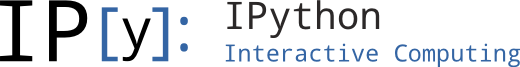

In [40]:
i

In [41]:
j

You can also use `i=Image(file='filename.png')`.

**Embedding images**

By default images are embedded in the Notebook document i.e. available offline. However, it is possible to explicitly tell IPython to store only the link to the image.

![](http://www.svgopen.org/2003/papers/WhyCompileSvg/myButterfly.png)

    ![](http://www.svgopen.org/2003/papers/WhyCompileSvg/myButterfly.png)

In [42]:
from IPython.display import Image

# by default Image data are embedded
Embed=Image('http://www.svgopen.org/2003/papers/WhyCompileSvg/myButterfly.png')

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url='http://www.svgopen.org/2003/papers/WhyCompileSvg/myButterfly.png')

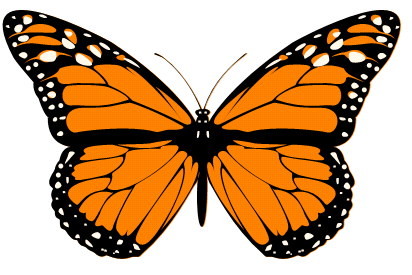

In [43]:
Embed

In [44]:
SoftLinked

**Linking to other Python Files**

In [19]:
from IPython.display import FileLink, FileLinks
FileLink('./matplotlib.ipynb')

/Users/rstein/Dropbox/Python/python_sp16/lessons/matplotlib.ipynb

If you wish to link all the files in your current directory you can use the following command:

In [20]:
FileLinks('.')

./
  .DS_Store
  api.ipynb
  average.py
  foo.py
  intro-exercises.md
  intro.md
  ipython.ipynb
  jupyter.ipynb
  matplotlib.ipynb
  modules.ipynb
  numba.ipynb
  numpy-scipy.ipynb
  oop-intro.ipynb
  pandas-working.ipynb
  pandas.ipynb
  pdb.ipynb
  satellite-kmeans.ipynb
  scikit-learn.ipynb
./.ipynb_checkpoints/
  ipython-checkpoint.ipynb
  matplotlib-checkpoint.ipynb
  oop-intro-checkpoint.ipynb
  pandas-checkpoint.ipynb
  pandas-working-checkpoint.ipynb
  satellite-kmeans-checkpoint.ipynb
  scikit-learn-checkpoint.ipynb
./data/
  2012.csv
  microarray.csv
  NFL_1979.csv
  wheres-waldo-locations.csv
./pngs/
  bessel.png
  chebyshev.png
  drum-modes-1.png
  drum-modes-10.png
  drum-modes-11.png
  drum-modes-12.png
  drum-modes-13.png
  drum-modes-14.png
  drum-modes-15.png
  drum-modes-16.png
  drum-modes-17.png
  drum-modes-18.png
  drum-modes-19.png
  drum-modes-2.png
  drum-modes-20.png
  drum-modes-21.png
  drum-modes-22.png
  drum-modes-23.png
  drum-modes-24.png
  drum-modes-25.png
  drum-modes-26.png
  drum-modes-27.png
  drum-modes-28.png
  drum-modes-29.png
  drum-modes-3.png
  drum-modes-30.png
  drum-modes-31.png
  drum-modes-32.png
  drum-modes-33.png
  drum-modes-34.png
  drum-modes-35.png
  drum-modes-36.png
  drum-modes-37.png
  drum-modes-38.png
  drum-modes-39.png
  drum-modes-4.png
  drum-modes-40.png
  drum-modes-5.png
  drum-modes-6.png
  drum-modes-7.png
  drum-modes-8.png
  drum-modes-9.png
  laguerre.png

**Videos**

In [21]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('Fi30zjQhtWY')

In [22]:
YouTubeVideo('Fi30zjQhtWY',start='120')

In [23]:
from IPython.display import HTML
from base64 import b64encode
video = open("VideoDemo.m4v", "rb").read()
video_encoded = b64encode(video)
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

FileNotFoundError: [Errno 2] No such file or directory: 'VideoDemo.m4v'

**HTML**

In [24]:
from IPython.display import HTML

In [25]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

In [26]:
h = HTML(s); h

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


In [27]:
import pandas as pd
from random import randint
df = pd.DataFrame({'A': [randint(1, 9) for x in range(10)],
                   'B': [randint(1, 9)*10 for x in range(10)],
                   'C': [randint(1, 9)*100 for x in range(10)]})
df

,A,B,C
0,2,50,500
1,2,30,500
2,5,90,800
3,3,60,800
4,7,50,800
5,3,70,200
6,5,60,500
7,3,30,900
8,5,70,400
9,3,70,900


**External Sites**

In [28]:
from IPython.display import HTML
HTML('<iframe src=https://m.cumtd.com/ width=700 height=340/>')

<div class="alert alert-warning">
Generally speaking, `iframe`s behave poorly in Jupyter notebooks since the HTML is scrubbed of them.  The above is a roundabout way of including them.
</div>

**$\LaTeX$**

In [29]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

In [30]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

## Basic Markdown

Markdown is intended to be as easy-to-read and easy-to-write as is feasible. Markdown’s syntax is intended for one purpose: to be used as a format for writing for the web.

Markdown is not a replacement for HTML, or even close to it. Its syntax is very small, corresponding only to a very small subset of HTML tags. The idea is not to create a syntax that makes it easier to insert HTML tags. HTML is a publishing format; Markdown is a writing format. Thus, Markdown’s formatting syntax only addresses issues that can be conveyed in plain text.

**Headers**

#Heading 1

##Heading 2

###Heading 3

**Thematic breaks**

In markdown, you can create a **thematic break** with any of the following:

- \_\_\_: three consecutive underscores
- ---: three consecutive dashes
- \*\*\*: three consecutive asterisks
renders to:

---

**Emphasis**

The following snippet of text is rendered as bold text.

**bold text**

The following snippet of text is rendered as italicized text.

*italicized text*

~~strike through~~

**Lists**

* valid bullet
    - valid bullet
+ valid bullet

**Tables**

| Option | Description |
| ------ | ----------- |
| data   | path to data files to supply the data that will be passed into templates. |
| engine | engine to be used for processing templates. Handlebars is the default. |
| ext    | extension to be used for dest files. |

**References**

- [Rich Displays Examples](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%205%20-%20Rich%20Display%20System.ipynb)
- [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html)
- [RMagics](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Builtin%20Extensions/R%20Magics.ipynb)